# TensorFlow基本使用

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

构建测试数据

In [2]:
x_data = np.random.rand(100).astype(np.float32) # tf 内置float为32
y_data = x_data * 0.1 + 0.3
x_data.shape

(100,)

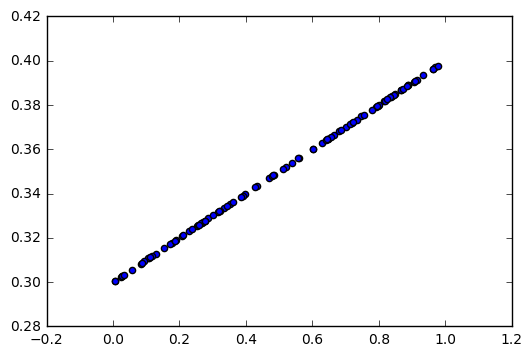

In [3]:
plt.scatter(x_data, y_data)
plt.show()

搭建TensorFlow结构

In [4]:
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 权重
biases = tf.Variable(tf.zeros([1])) # 偏置
print Weights
print biases
y = Weights*x_data + biases
# 可以发现都为TensorFlow数据类型

Tensor("Variable/read:0", shape=(1,), dtype=float32)
Tensor("Variable_1/read:0", shape=(1,), dtype=float32)


In [5]:
loss = tf.reduce_mean(tf.square(y - y_data)) # 损失函数为预测值与真值差值平方的均值
optimizer = tf.train.GradientDescentOptimizer(0.5) # 梯度下降
train = optimizer.minimize(loss)

In [6]:
# 初始化变量，非常重要，不要忘了
init = tf.global_variables_initializer()

with tf.Session() as sess: # 使用这种写法在运行完Session之后就会自动close
    sess.run(init) # 运行完初始化之后，就可以运行下面的函数了。。将函数头指针传递给run
    print sess.run(Weights) # 每次输出的结果都不一样，因为我定义的为-1到1的随机数
    print sess.run(biases)

[ 0.82031083]
[ 0.]


In [7]:
# 这里运行最小化 梯度下降法，优化变量
with tf.Session() as sess:
    sess.run(init) # 先初始化变量
    for step in range(200):# 优化200次
        sess.run(train) # 运行一次梯度下降
        if step % 20 == 0:
            print step, '------>', sess.run(Weights), sess.run(biases)

0 ------> [ 0.81413007] [-0.12773143]
20 ------> [ 0.27405071] [ 0.20625322]
40 ------> [ 0.141378] [ 0.27771309]
60 ------> [ 0.10983703] [ 0.29470161]
80 ------> [ 0.1023386] [ 0.29874039]
100 ------> [ 0.10055596] [ 0.29970056]
120 ------> [ 0.10013218] [ 0.29992881]
140 ------> [ 0.10003142] [ 0.29998308]
160 ------> [ 0.10000747] [ 0.29999599]
180 ------> [ 0.10000179] [ 0.29999906]


运行完之后，发现权重为0.1，偏置为0.3。与真值一样